<a href="https://colab.research.google.com/github/shila121/projects/blob/main/Churn_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the problem statement
Develop a predictive model to identify customers who are likely to churn within the next few months

# 2. Here, we try to analyse the data using various steps mentioned below:



*  Hypothesis Testing
*   EDA(univariate/Bi-variate analysis)

*   Missing data analysis
*   Numerical data analysis

*   Outliers analysis
*   Categorical data analysis

In [43]:
#1. Hypothesis Testing
# Null Hypothesis: there is no relationship between independent variable and target
# Alternate Hypothesis : there is significant relationship between independent and dependent variable

# 1. Hypothesis Testing


In [44]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data =  pd.read_csv('Telco.csv')

print(data.head())
print(data.columns,len(data.columns),data.shape)
print()
# categorical columns
catCols =  data.select_dtypes('object').columns
print('categorical columns of data:',catCols,len(catCols))

# numerical columns
numCols = data.select_dtypes('number').columns
print('numeric columns of data:',numCols,len(numCols))

# print(data['Churn'])

# change loan_status column to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])
print(data['Churn'].unique())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# check the data imbalance

In [45]:
data['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [46]:
1869/5174

0.36122922303826827

In [47]:
data =  data.drop('customerID', axis = 1)
catCols = catCols.drop('customerID')
catCols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [49]:
# we will carry out z-test to know the impact of numerical column
from statsmodels.stats import weightstats as stests

significant_numCols ,in_signifiacnt_numCols = [],[]

for i in numCols:
  if i != 'Churn':
    p_val = stests.ztest(data[i],data.Churn)
    p_val = p_val[1]
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_numCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_signifiacnt_numCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant numerical columns :',significant_numCols,len(significant_numCols))
print('in-significant numerical columns:',in_signifiacnt_numCols,len(in_signifiacnt_numCols))

columns: SeniorCitizen p_val: 2.9454861117551704e-51
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: tenure p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: MonthlyCharges p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
significant numerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges'] 3
in-significant numerical columns: [] 0


In [50]:
# we will carry out chi-square test on the categorical columns to know their impact

from scipy.stats import chi2_contingency

significant_catCols,in_significant_catCols = [],[]

for i in catCols:
  if i != 'Churn':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.Churn))
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_catCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_significant_catCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant categorical columns :',significant_catCols,len(significant_catCols))
print('in-significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

columns: gender p_val: 0.48657873605618596
Accept Null Hypothesis,Insignificant predictors
-------------------------------------------------
columns: Partner p_val: 2.1399113440759935e-36
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Dependents p_val: 4.9249216612154196e-43
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: PhoneService p_val: 0.3387825358066928
Accept Null Hypothesis,Insignificant predictors
-------------------------------------------------
columns: MultipleLines p_val: 0.0034643829548773
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: InternetService p_val: 9.571788222840544e-160
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: OnlineSecurity p_val: 2.661149635176552e-185
Reject Null Hypothesis,Significant predictor
---------------------------------------------

# 2. EDA(univariate/Bi-variate analysis)

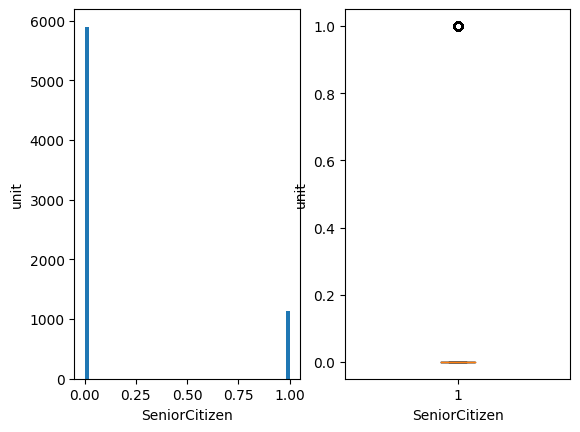

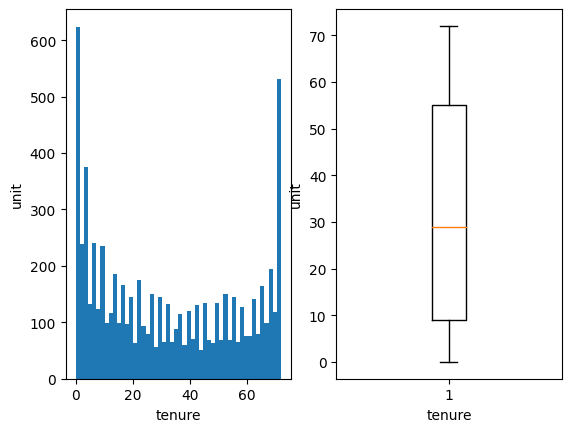

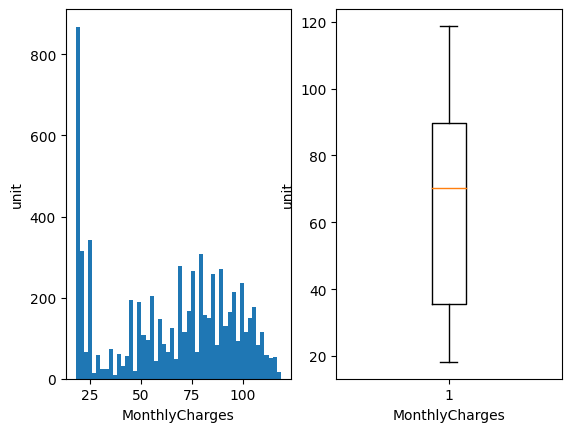

In [51]:
# step2:EDA( Univariate/Bivariate)

# Univariate analysis of numerical columns by using histogram
for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')
  plt.show()

In [52]:
# Univariate analysis of the categoriacl columns with value_counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('--------------------------------------')

column: gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------
column: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------
column: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------
column: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------
column: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------
column: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------
column: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------------------------------
column: OnlineBackup
No                   

                SeniorCitizen    tenure  MonthlyCharges     Churn
SeniorCitizen        1.000000  0.016567        0.220173  0.150889
tenure               0.016567  1.000000        0.247900 -0.352229
MonthlyCharges       0.220173  0.247900        1.000000  0.193356
Churn                0.150889 -0.352229        0.193356  1.000000


<Axes: >

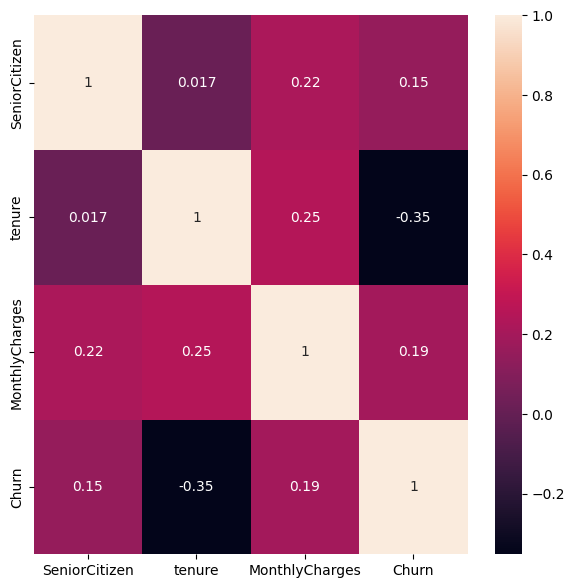

In [53]:
# Bivariate analysis of numeriacl columns by co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize =(7,7))
sns.heatmap(matrix,annot = True)

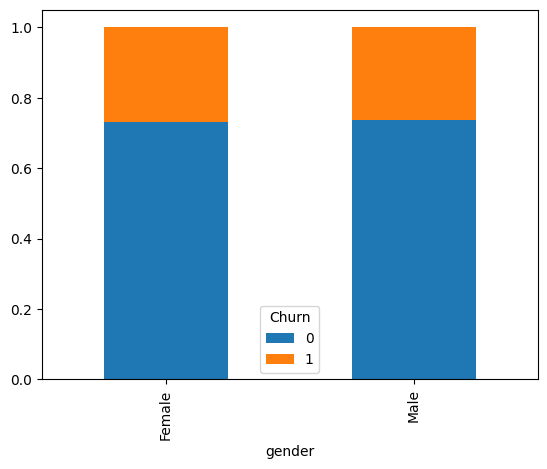

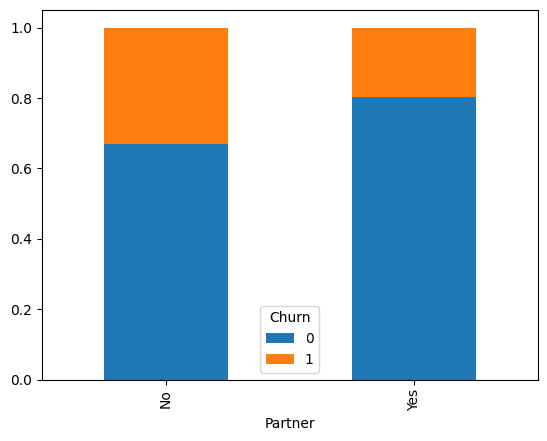

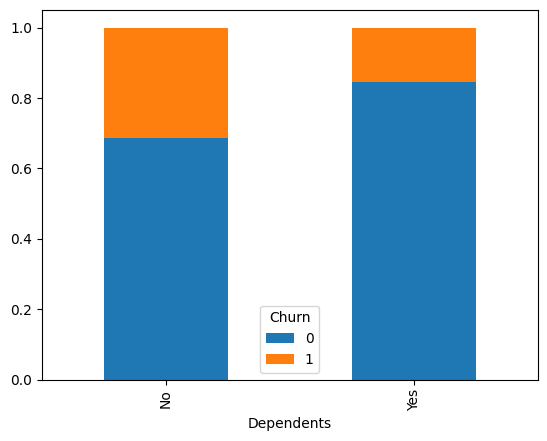

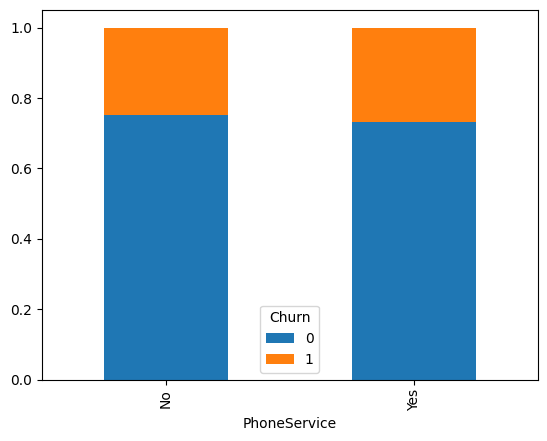

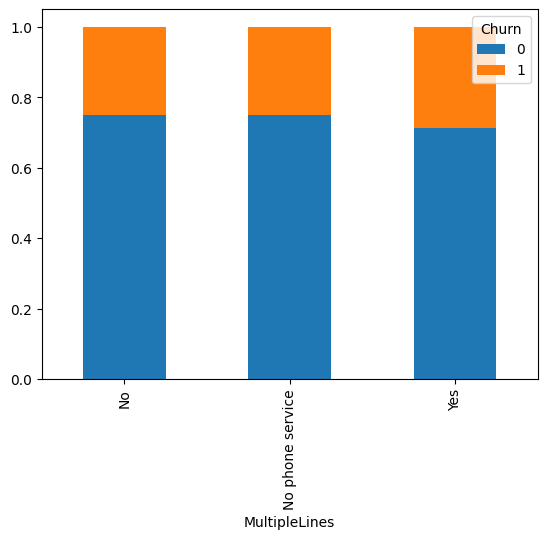

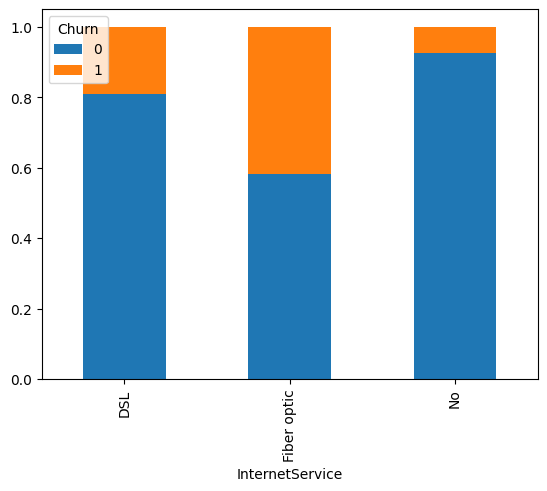

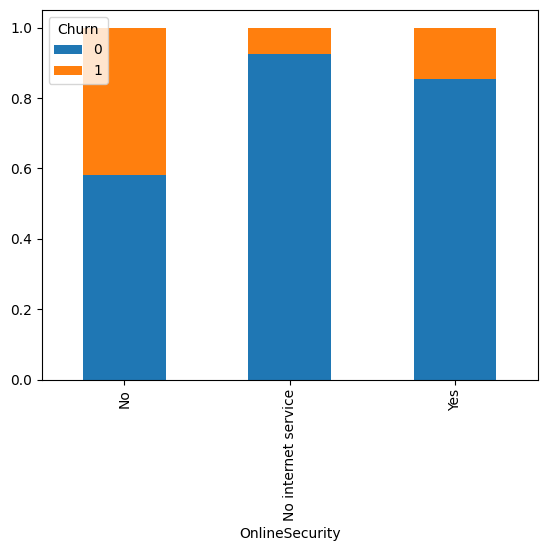

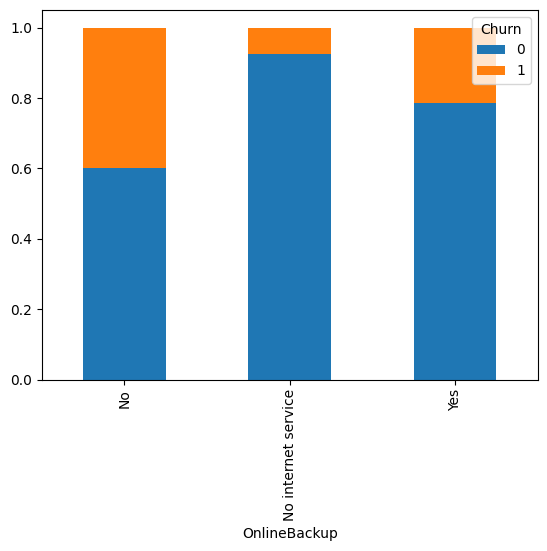

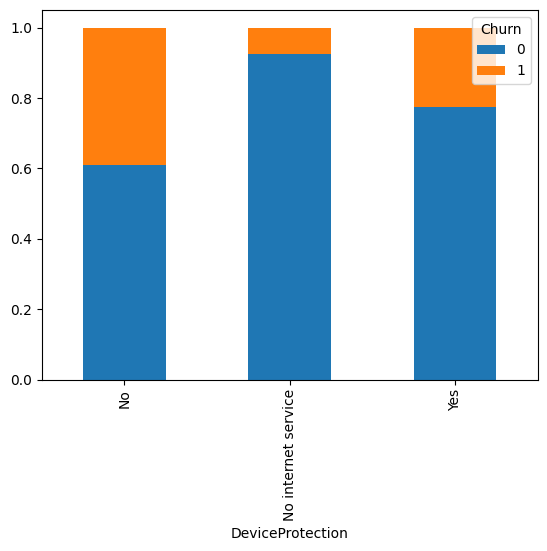

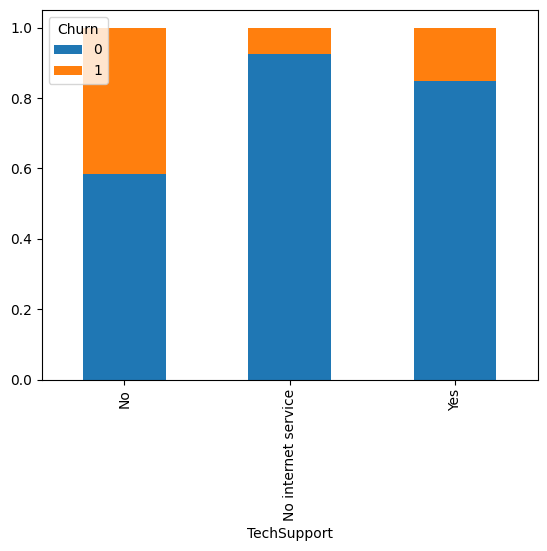

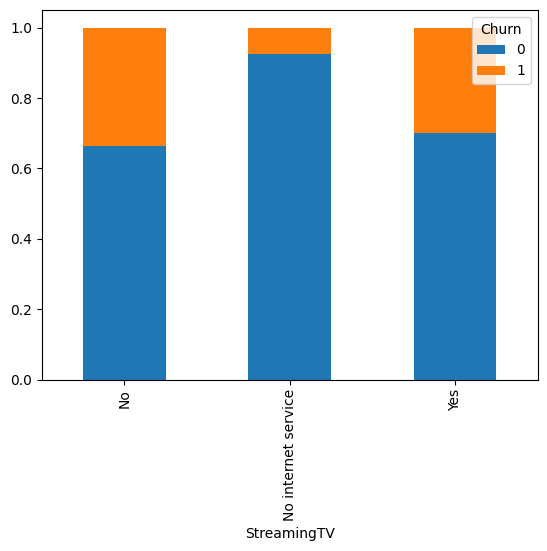

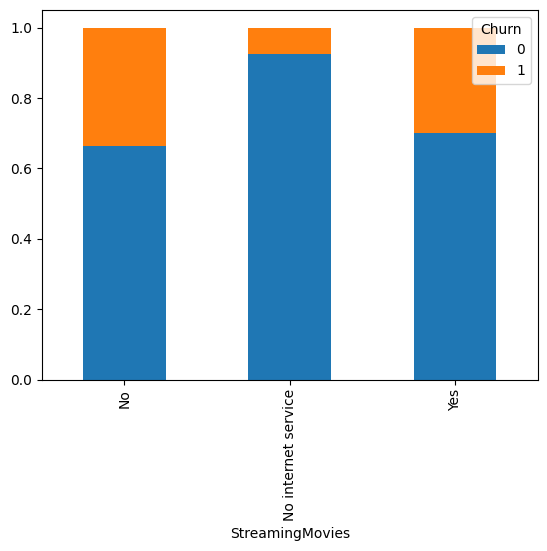

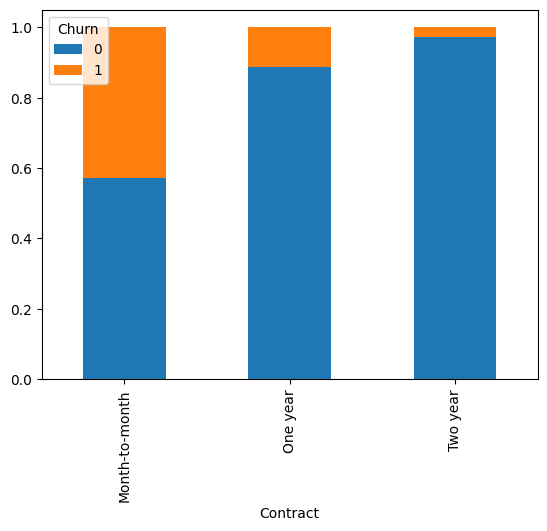

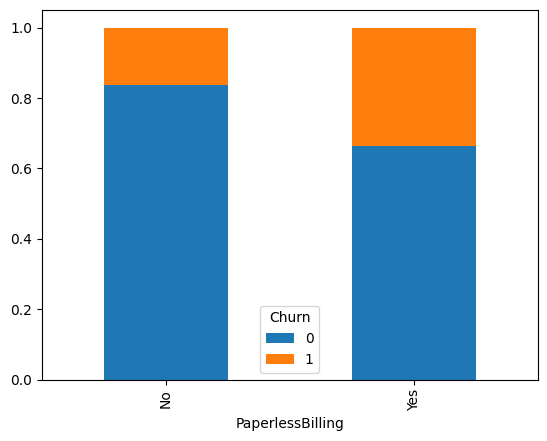

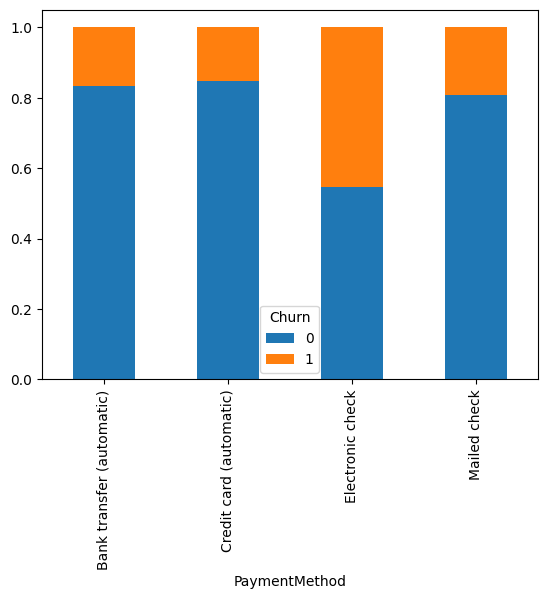

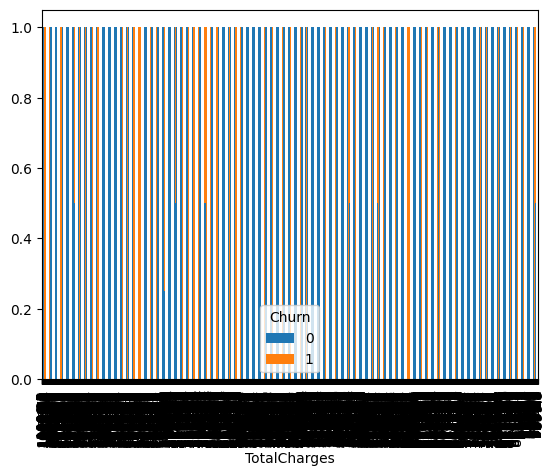

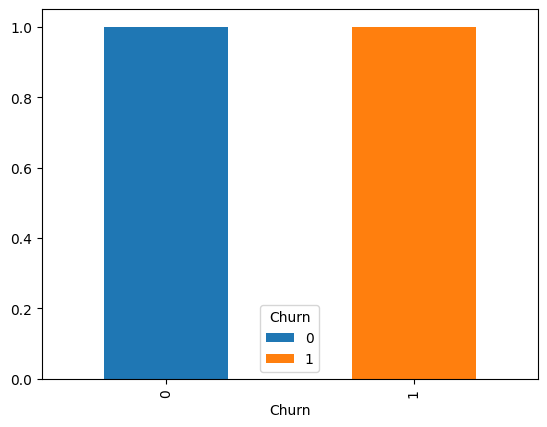

In [54]:
# Bivariate analysis of Categoriacal columns by crosstab

for i in catCols:
  category = pd.crosstab(data[i],data['Churn'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  try:

    plt.show()
  except:
    pass

# 3. Missing Data Analysis

In [55]:
# Step 3:Missing data
# lets analyse if the data contains any missing values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 4. Numerical data analysis

numerical columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object') 3
   SeniorCitizen  tenure  MonthlyCharges
0              0       1           29.85
1              0      34           56.95
2              0       2           53.85
3              0      45           42.30
4              0       2           70.70
discrete columns in numericals columns: ['SeniorCitizen'] 1


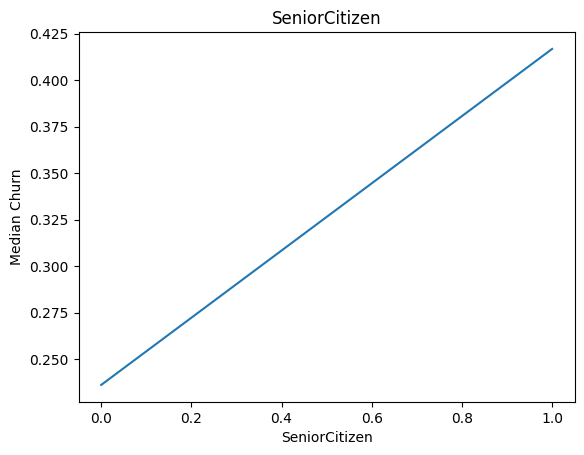

In [56]:
# step 4:Numerical data analysis

print('numerical columns:',numCols,len(numCols))

# -> 1. visualize numerical columns
print(data[numCols].head())

# ->2.lets make list of discrete variables among numerical columns

discrete_numCols = [var for var in numCols if len(data[var].unique()) < 20]
print('discrete columns in numericals columns:',discrete_numCols,len(discrete_numCols))

# visualize discrete columns
data[discrete_numCols].head()

# visualize their relationship to the target
def analyse_discrete(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Churn'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Churn')
  plt.show()

# lets run for each column in discrete_numCols
for var in discrete_numCols:
  analyse_discrete(data,var)

continuous numerical columns: ['tenure', 'MonthlyCharges'] 2
   tenure  MonthlyCharges
0       1           29.85
1      34           56.95
2       2           53.85
3      45           42.30
4       2           70.70


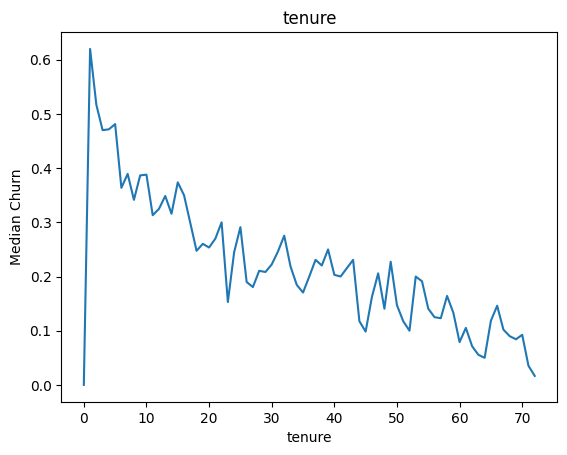

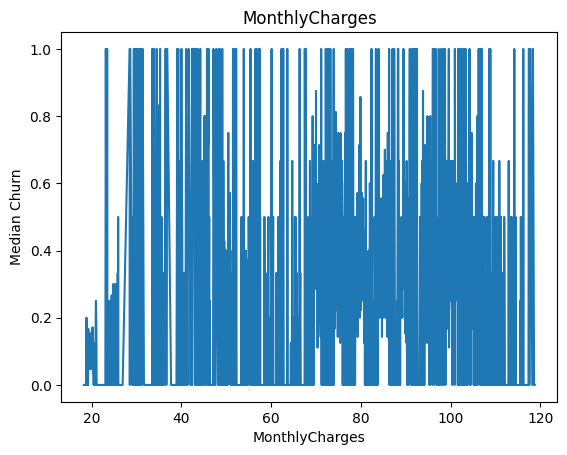

In [57]:
# ->3. lets make a list of continuous numerical column

cont_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',cont_numCols,len(cont_numCols))

# visualize
print(data[cont_numCols].head())

# # visualize their relationship to the target
def analyse_continuous(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Churn'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Churn')
  plt.show()

# lets run for each column in cont_numCols
for var in cont_numCols:
  analyse_continuous(data,var)


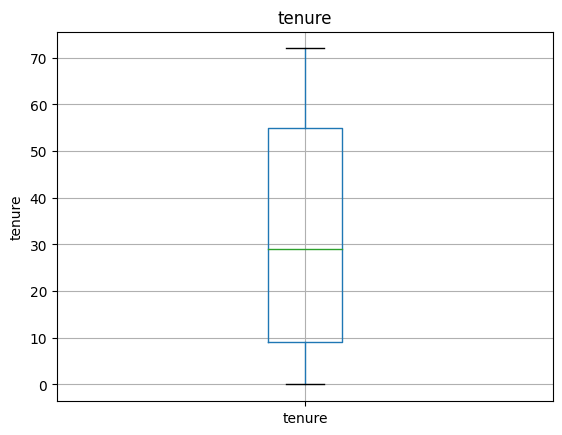

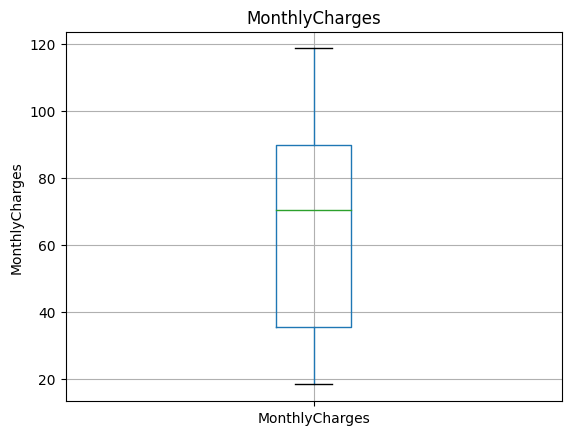

In [58]:
# step 5:Outliers presence in the data

# we will make boxplots on the continuous numeric columns to visualize the presence of outliers

def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.ylabel(var)
  plt.show()

for var in cont_numCols:
   if var not in ['RowNumber', 'CustomerId']:
    find_outliers(data,var)

# 6. Categorical data analysis

In [59]:
# step 6. Categorical data anlysis
print('categorical columns:',catCols,len(catCols))

#->1. visualize categorical variables
data[catCols].head()

categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object') 17


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,1
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,1


In [60]:
# ->2.cardinality of categorical variables
print(data[catCols].nunique())

print(data.shape)

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64
(7043, 20)


In [61]:
# ->3. analyse rare labels in categorical columns

def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['Churn'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

Series([], Name: Churn, dtype: float64)

TotalCharges
          0.001562
100.2     0.000142
100.25    0.000142
100.35    0.000142
100.4     0.000142
            ...   
997.75    0.000142
998.1     0.000142
999.45    0.000142
999.8     0.000142
999.9     0.000142
Name: Churn, Length: 6531, dtype: float64

Series([], Name: Churn, dtype: float64)



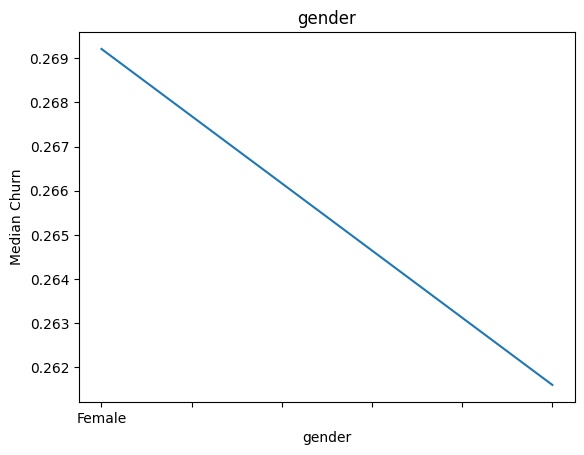

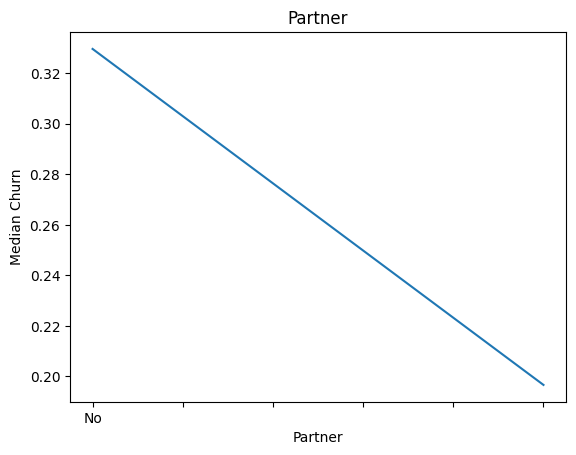

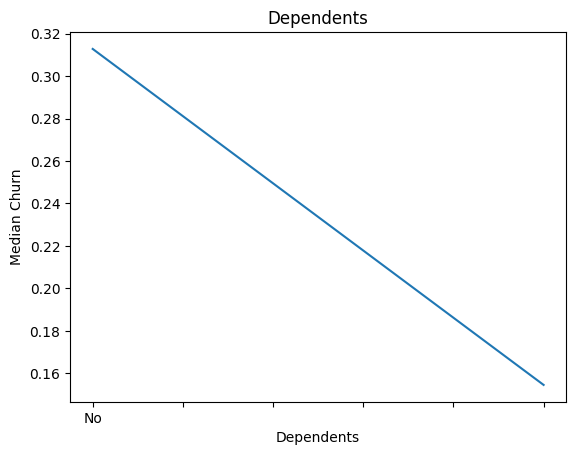

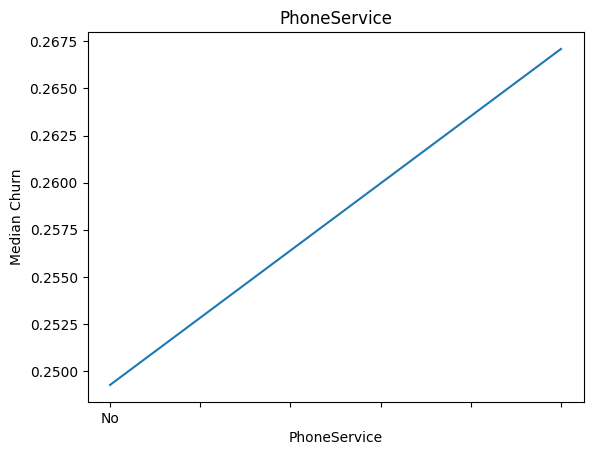

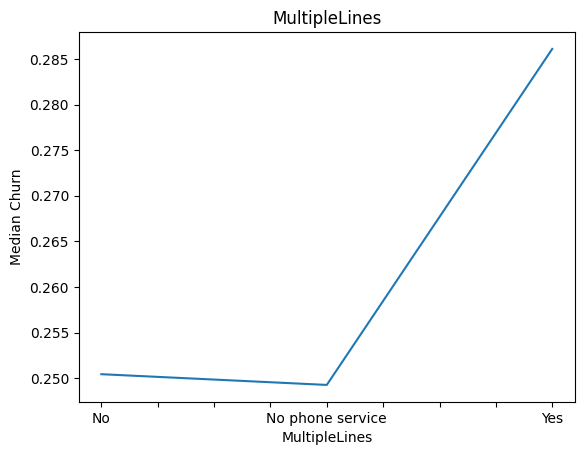

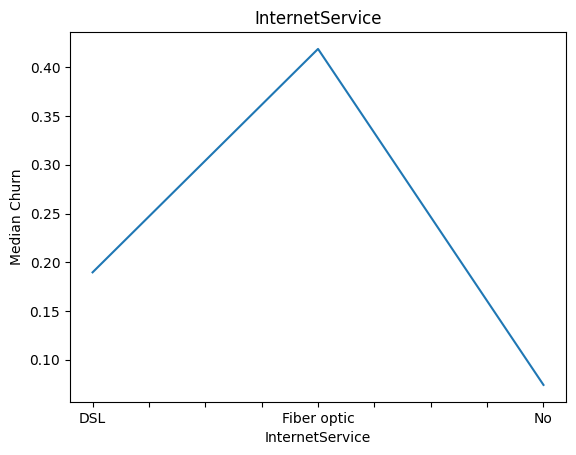

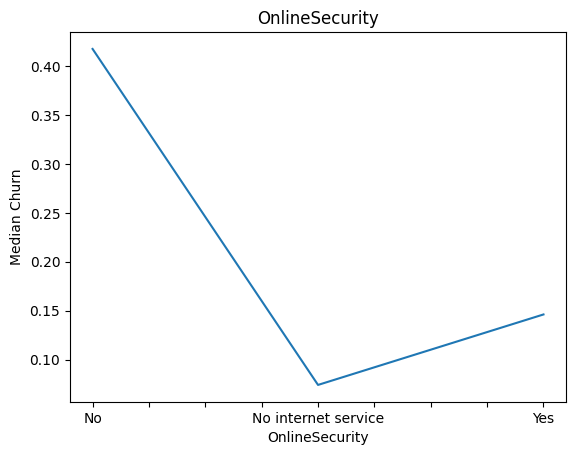

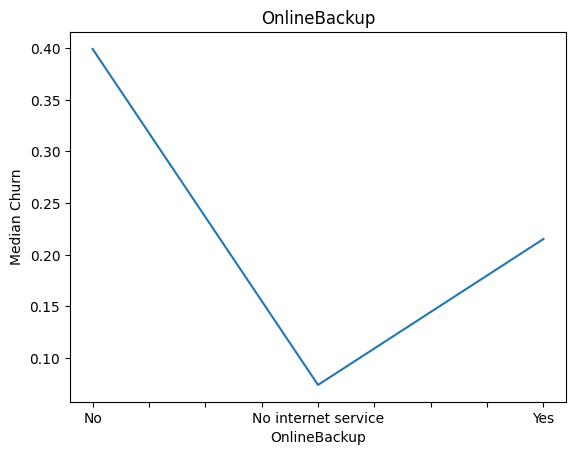

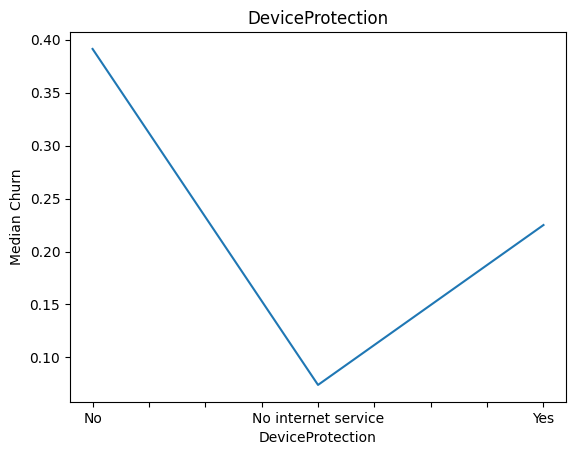

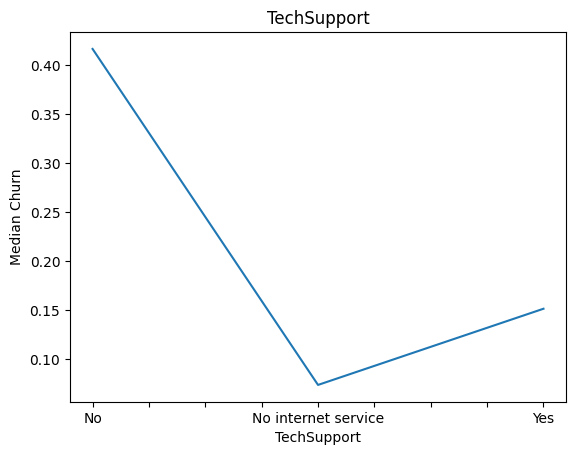

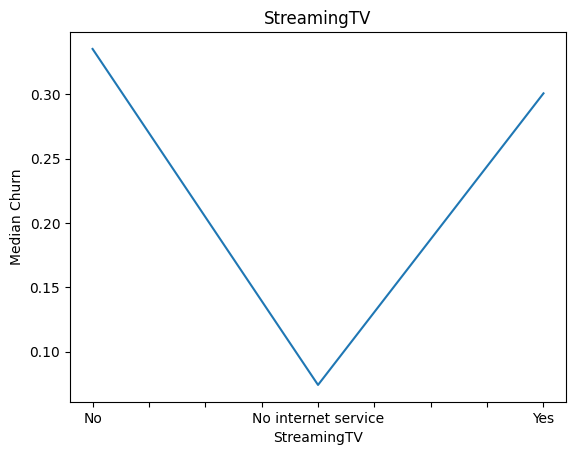

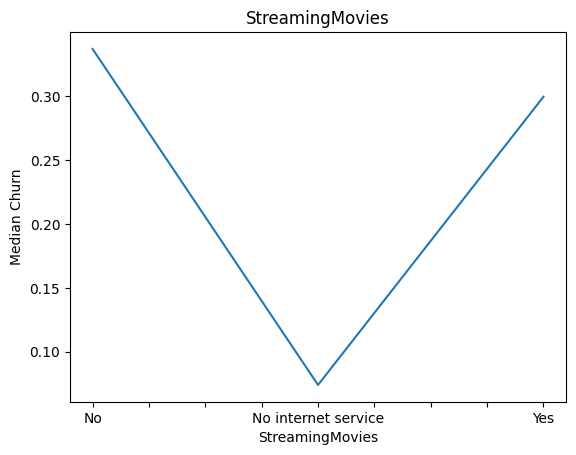

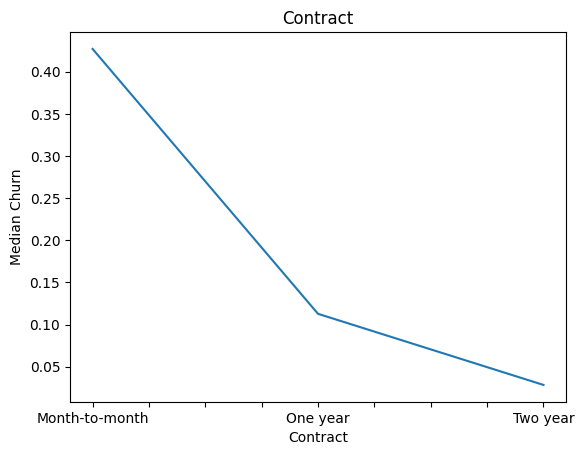

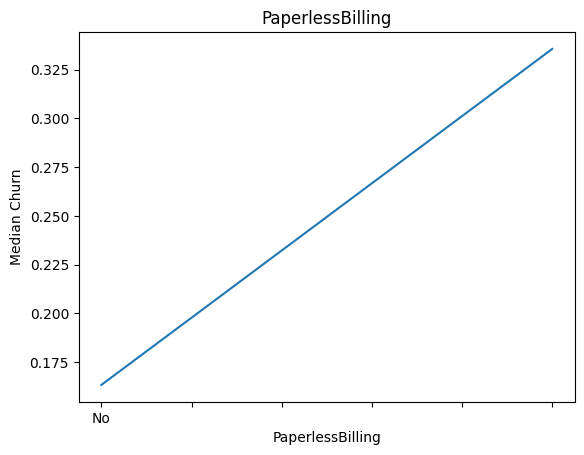

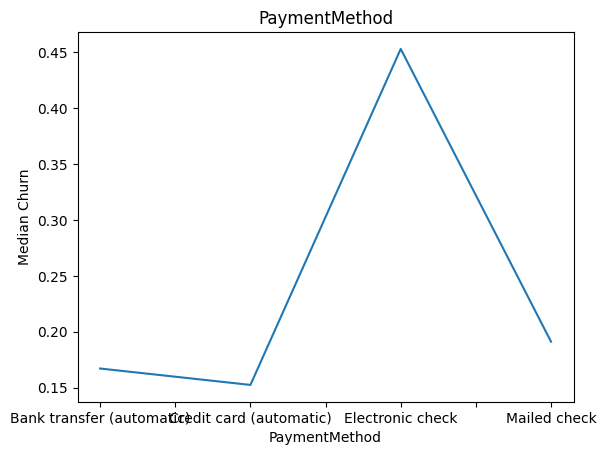

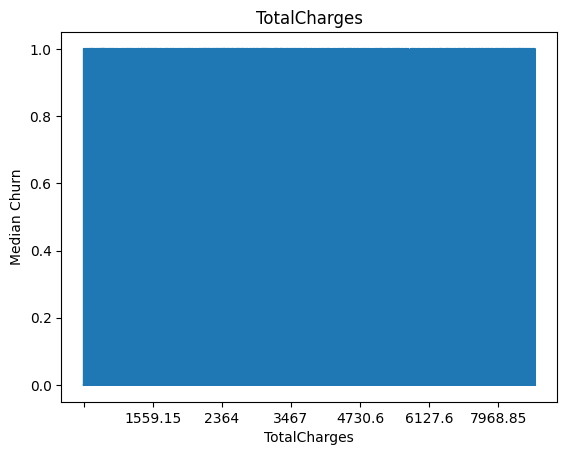

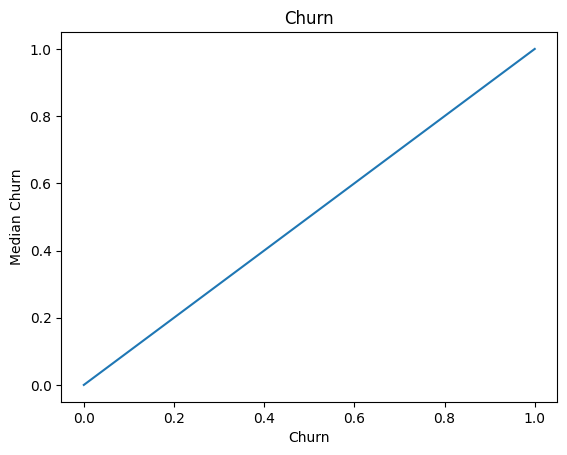

In [62]:
# ->4. analyse categorical columns to target

for i in catCols:
  analyse_discrete(data,i)

# 3. Feature Engineering
train test split

missing data treatment

temporal variable treatment

non-guassian distributed variables

rare categorical labels treatment

encoding categorical label

feature scaling

In [63]:
# 1 .Train test split
# ->step 1 .train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['Churn'],random_state = 0,test_size = 0.2)
print(X_train.shape,X_test.shape)

(5634, 20) (1409, 20)


In [64]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
# 2. No missing data, so no treatment is required

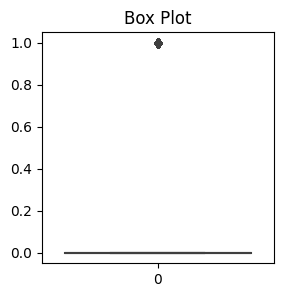

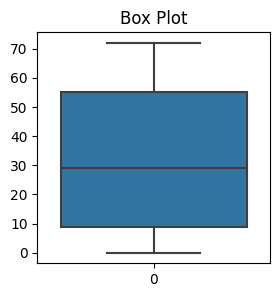

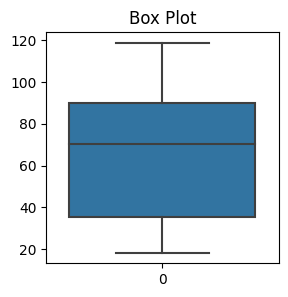

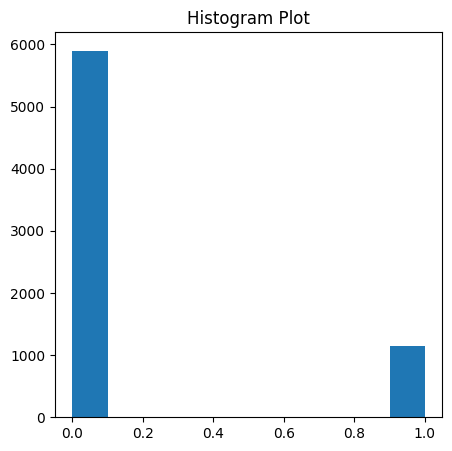

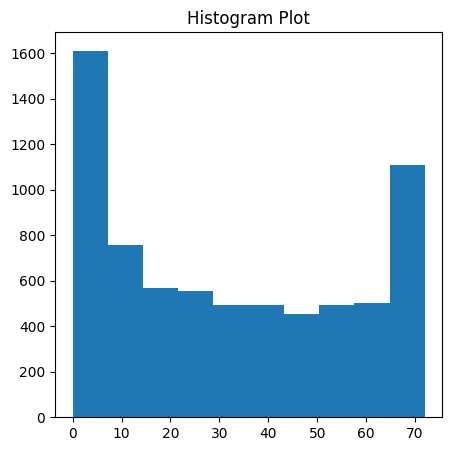

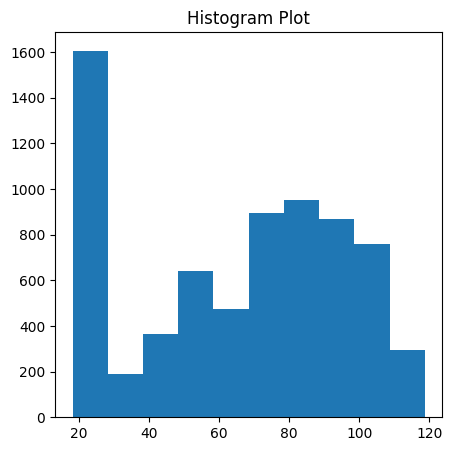

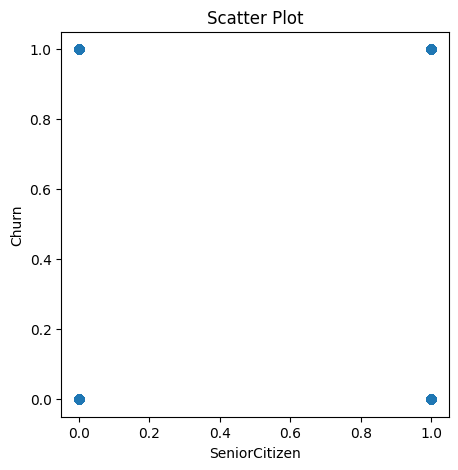

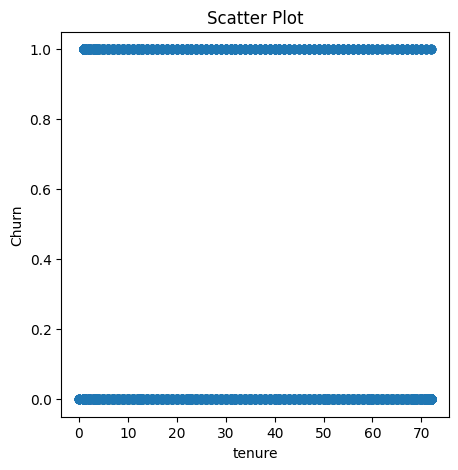

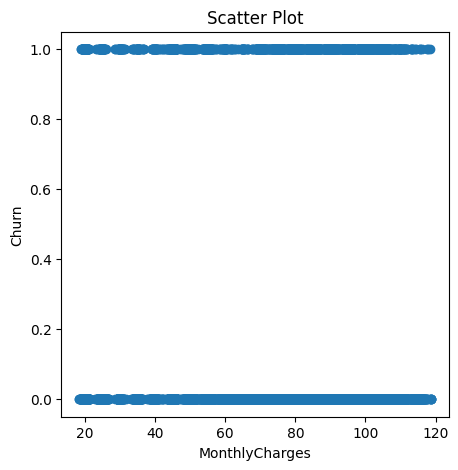

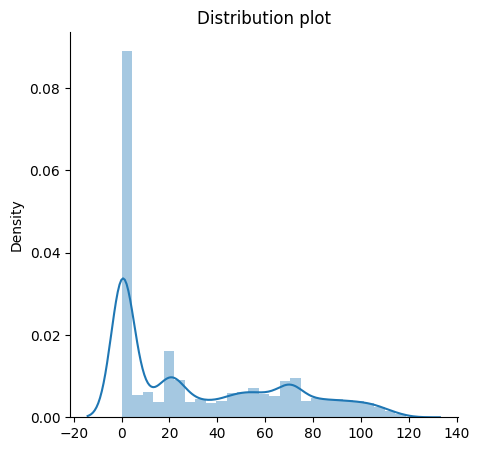

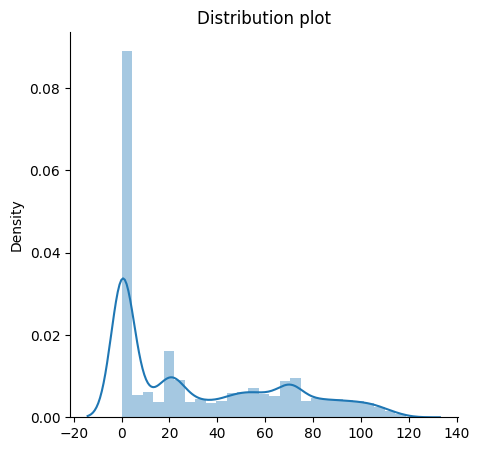

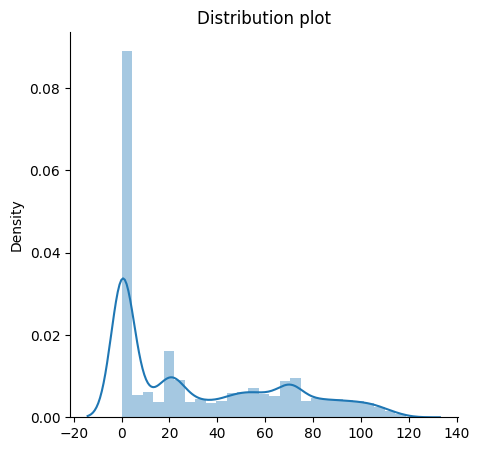

<Figure size 500x500 with 0 Axes>

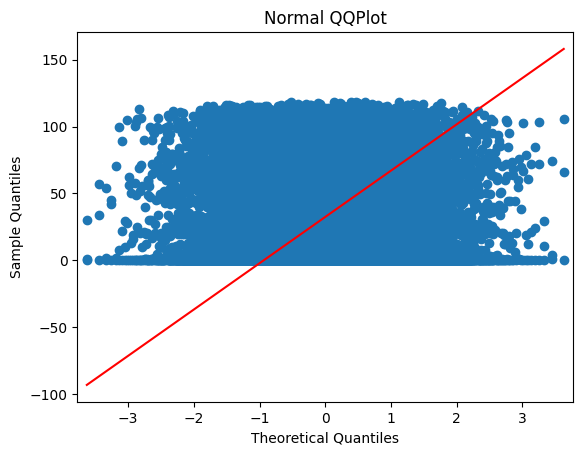

In [66]:
# 3.Outliers Treatment

# outliers visualisatuin:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(3,3))
    plt.title("Box Plot")
    sns.boxplot(df[i])
    plt.show()
Box_plots(data)


def hist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    plt.hist(df[i])
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data)


def scatter_plots(df1,df2):
  for i in df1[numCols].columns:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(df1[i],df2)
    ax.set_xlabel(i)
    ax.set_ylabel('Churn')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data[numCols],data['Churn'])

def dist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data[numCols])

def qq_plots(df):
    plt.figure(figsize=(5, 5))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(data[numCols])

In [67]:
# tracing outliers

import pandas as pd
import numpy as np


out={}
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    for col in df.columns:
        outliers = df[(df[col] > upper_tail[col]) | (df[col] < lower_tail[col])]
        #  out.extend(outliers[col].tolist())
        out[col] = outliers[col].tolist()

    print("Outliers:", out)

iqr_outliers(data[numCols])


Outliers: {'SeniorCitizen': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

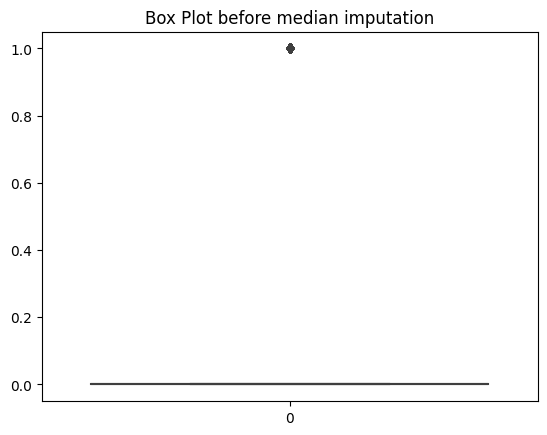

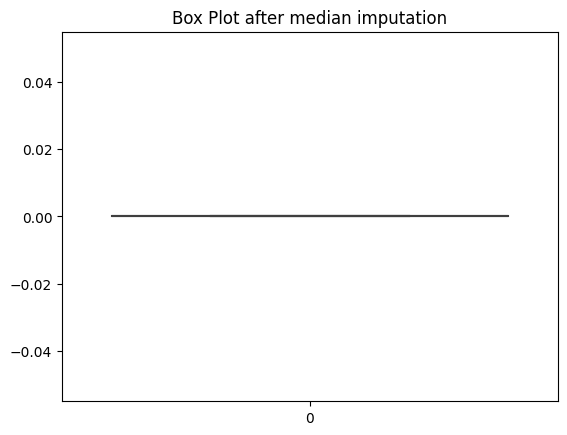

In [68]:
# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['SeniorCitizen'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['SeniorCitizen'].quantile(0.25)
q3 = X_train['SeniorCitizen'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['SeniorCitizen'])
for i in X_train['SeniorCitizen']:
    if i > Upper_tail or i < Lower_tail:
            X_train['SeniorCitizen'] = X_train['SeniorCitizen'].replace(i, med)
sns.boxplot(X_train['SeniorCitizen'])
plt.title("Box Plot after median imputation")
plt.show()

In [69]:
# 6.Encoding categorical variables


In [70]:
# ->6.Encoding categorical variables
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'Churn')

print(X_train.shape,X_test.shape)
print(X_train.head())

(5634, 20) (1409, 20)
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2920       1              0        0           1      72             1   
2966       1              0        1           1      14             0   
6099       1              0        0           0      71             1   
5482       0              0        0           0      33             1   
2012       1              0        0           1      47             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2920              1                1               1             1   
2966              0                1               2             2   
6099              2                0               0             0   
5482              1                1               2             2   
2012              2                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2920                 1           

In [71]:
# 7 Feature engineering , feature scaling

# ->7 Feature engineering , feature scaling
train_vars = [var for var in X_train.columns if var not in ['Churn']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] 19


In [72]:
# 4.Feature Selection
# for feature selection ,we will choose Lasso regression as it has the capability to shrink some of the coefficients to 0 .

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())



      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2920     0.5            0.0     -1.0         0.0  0.914894           0.0   
2966     0.5            0.0      0.0         0.0 -0.319149          -1.0   
6099     0.5            0.0     -1.0        -1.0  0.893617           0.0   
5482    -0.5            0.0     -1.0        -1.0  0.085106           0.0   
2012     0.5            0.0     -1.0         0.0  0.382979           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2920            0.0              0.0             0.0           0.0   
2966           -1.0              0.0             1.0           1.0   
6099            1.0             -1.0            -1.0          -1.0   
5482            0.0              0.0             1.0           1.0   
2012            1.0              1.0             0.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2920               0.0          0.0        

In [73]:
y_train = X_train['Churn']
y_test = X_test['Churn']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Churn'], axis=1, inplace=True)
X_test.drop(['Churn'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [74]:
sel_.get_support()

array([False, False, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True])

In [75]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 19
selected features: 11
features with coefficients shrank to zero: 8


In [76]:
# print the selected features
selected_feats

Index(['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [77]:
# model building

from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(('XGBClassifier',XGBClassifier()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))


  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :0.98875080479236,CV min:0.9839131599805843,CV std :0.003055526516594111
----------------------------------
name:--->> Linear svc
----------------------------------
CV mean Score :0.9911720029320623,CV min:0.9857135515319645,CV std :0.0026836012521476407
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :0.9895549310181184,CV min:0.9803024573066307,CV std :0.0037780151417375076
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9523410026749953,CV min:0.9396694756158972,CV std :0.006254486321776979
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :0.9550343656714396,CV min:0.9415544714433868,CV std :0.0070723488716307745
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV me

In [81]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)

In [105]:
# selecting a model : XGB
# Fit Extreme Gradient boosting classifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train.loc[:, X_train.columns != 'Churn'],y_train)
best_model(xgb_grid)


0.9829595225224231
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [111]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=5,missing = -1 ,n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train.loc[:, X_train.columns != 'Churn'],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=5, missing=-1,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [88]:
from sklearn.metrics import classification_report

In [93]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1409, dtype: int64

In [97]:
X_test.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        1267
dtype: int64

In [98]:
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['TotalCharges'].median())

In [99]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [101]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [102]:
X_test = X_test.dropna()

In [109]:
X_test.fillna(-1, inplace=True)
Y_pred = XGB.predict(X_test)

In [112]:
Y_pred = XGB.predict(X_test)
# print(classification_report(y_test, Y_pred))

In [113]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1041
           1       0.51      0.08      0.14       368

    accuracy                           0.74      1409
   macro avg       0.63      0.53      0.49      1409
weighted avg       0.69      0.74      0.66      1409

